### Question 2 (using pytorch)
#### Veera Anand

In [1]:
import torch
import numpy as np
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

#### 0. Use the ucimlrepo library to fetch the "Default of Credit Card Clients" dataset (ID: 350).

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

CCC_dataset = fetch_ucirepo(id=350)  

df = pd.concat([CCC_dataset.data.features, CCC_dataset.data.targets], axis=1)

print("Shape:", df.shape)
print("Column names:", df.columns.tolist())
df.head()

Shape: (30000, 24)
Column names: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y']


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### 1. Load the features (X) and target (y) as pandas DataFrames.

In [3]:
X = df.drop(columns='Y')  
y = df[['Y']]             

print("X shape:", X.shape)
print("y shape:", y.shape)
X.head(), y.head()

X shape: (30000, 23)
y shape: (30000, 1)


(       X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...    X14    X15    X16  \
 0   20000   2   2   1  24   2   2  -1  -1   -2  ...    689      0      0   
 1  120000   2   2   2  26  -1   2   0   0    0  ...   2682   3272   3455   
 2   90000   2   2   2  34   0   0   0   0    0  ...  13559  14331  14948   
 3   50000   2   2   1  37   0   0   0   0    0  ...  49291  28314  28959   
 4   50000   1   2   1  57  -1   0  -1   0    0  ...  35835  20940  19146   
 
      X17   X18    X19    X20   X21   X22   X23  
 0      0     0    689      0     0     0     0  
 1   3261     0   1000   1000  1000     0  2000  
 2  15549  1518   1500   1000  1000  1000  5000  
 3  29547  2000   2019   1200  1100  1069  1000  
 4  19131  2000  36681  10000  9000   689   679  
 
 [5 rows x 23 columns],
    Y
 0  1
 1  1
 2  0
 3  0
 4  0)

#### 2. Print and review the dataset's metadata. 

In [4]:
print("Dataset Name:", CCC_dataset.metadata.name)
print("Dataset ID:", CCC_dataset.metadata.id)
print("Number of Instances:", CCC_dataset.metadata.num_instances)
print("Number of Features:", CCC_dataset.metadata.num_features)
print("Feature Types:", CCC_dataset.metadata.feature_types)
print("Target Name(s):", CCC_dataset.metadata.target_names)
print("License:", CCC_dataset.metadata.license)
print("Source:", CCC_dataset.metadata.source)

#missing data 
if CCC_dataset.metadata.description:
    print("Description:", CCC_dataset.metadata.description[:500] + "...")
else:
    print("Description: [No description available in metadata]")

Dataset Name: Default of Credit Card Clients
Dataset ID: None
Number of Instances: 30000
Number of Features: 23
Feature Types: ['Integer', 'Real']
Target Name(s): None
License: None
Source: None
Description: [No description available in metadata]


#### 3. Print and review the dataset's variable information. 

In [5]:
print("VARIABLE INFORMATION:\n")

for col in df.columns:
    print(f"Name: {col:20} | Type: {df[col].dtype}")

VARIABLE INFORMATION:

Name: X1                   | Type: int64
Name: X2                   | Type: int64
Name: X3                   | Type: int64
Name: X4                   | Type: int64
Name: X5                   | Type: int64
Name: X6                   | Type: int64
Name: X7                   | Type: int64
Name: X8                   | Type: int64
Name: X9                   | Type: int64
Name: X10                  | Type: int64
Name: X11                  | Type: int64
Name: X12                  | Type: int64
Name: X13                  | Type: int64
Name: X14                  | Type: int64
Name: X15                  | Type: int64
Name: X16                  | Type: int64
Name: X17                  | Type: int64
Name: X18                  | Type: int64
Name: X19                  | Type: int64
Name: X20                  | Type: int64
Name: X21                  | Type: int64
Name: X22                  | Type: int64
Name: X23                  | Type: int64
Name: Y                    | Type:

#### 4. Convert the feature and target DataFrames to NumPy arrays, then use tf.data.Dataset to create a shuffled dataset. Split it into three parts: 64% for training, 16% for validation, and 20% for testing. Batch each set using a batch size of 32.

In [6]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler

X_np = X.values
y_np = y.values

X_tens = torch.tensor(X_np, dtype=torch.float32)
y_tens = torch.tensor(y_np, dtype=torch.float32)

full_ds = TensorDataset(X_tens, y_tens)

total_l = len(full_ds)
train_l = int(0.64 * total_l)
val_l = int(0.16 * total_l)
test_l = total_l - train_l - val_l

train_set, val_set, test_set = random_split(full_ds, [train_l, val_l, test_l])

def get_features_targets(dataset):
    X, y = zip(*dataset)
    return torch.stack(X), torch.stack(y)

X_train_raw, y_train = get_features_targets(train_set)
X_val_raw, y_val = get_features_targets(val_set)
X_test_raw, y_test = get_features_targets(test_set)

scaler = StandardScaler()
X_train_scaled = torch.tensor(scaler.fit_transform(X_train_raw), dtype=torch.float32)
X_val_scaled = torch.tensor(scaler.transform(X_val_raw), dtype=torch.float32)
X_test_scaled = torch.tensor(scaler.transform(X_test_raw), dtype=torch.float32)

train_dataset = TensorDataset(X_train_scaled, y_train)
val_dataset = TensorDataset(X_val_scaled, y_val)
test_dataset = TensorDataset(X_test_scaled, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

#### 5. Define, compile, and train a feedforward neural network using TensorFlow’s Sequential API with two hidden layers (64 and 32 units), ReLU activations, dropout for regularization, and a sigmoid output for binary classification. Store the training history.

#### Defining the model: 

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.3)
        self.out = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.sigmoid(self.out(x)) 
        return x

#### Compiling Model (Loss + Optimizer) 

In [8]:
input_dim = X.shape[1]
model = FeedforwardNN(input_dim)
criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### Training the Model (with loss + accuracy tracking)

In [9]:
num_epochs = 20
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct_train = 0
    total_train = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        preds = (y_pred > 0.5).float()
        correct_train += (preds == y_batch).sum().item()
        total_train += y_batch.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)
    train_acc_history.append(correct_train / total_train)

    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

            preds = (y_pred > 0.5).float()
            correct_val += (preds == y_batch).sum().item()
            total_val += y_batch.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_loss_history.append(avg_val_loss)
    val_acc_history.append(correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {avg_train_loss:.4f}, Acc: {train_acc_history[-1]:.4f} | "
          f"Val Loss: {avg_val_loss:.4f}, Acc: {val_acc_history[-1]:.4f}")

Epoch 1/20 | Train Loss: 0.4896, Acc: 0.8021 | Val Loss: 0.4539, Acc: 0.8119
Epoch 2/20 | Train Loss: 0.4587, Acc: 0.8142 | Val Loss: 0.4458, Acc: 0.8163
Epoch 3/20 | Train Loss: 0.4510, Acc: 0.8165 | Val Loss: 0.4390, Acc: 0.8165
Epoch 4/20 | Train Loss: 0.4487, Acc: 0.8168 | Val Loss: 0.4369, Acc: 0.8181
Epoch 5/20 | Train Loss: 0.4457, Acc: 0.8176 | Val Loss: 0.4371, Acc: 0.8165
Epoch 6/20 | Train Loss: 0.4435, Acc: 0.8179 | Val Loss: 0.4324, Acc: 0.8202
Epoch 7/20 | Train Loss: 0.4410, Acc: 0.8172 | Val Loss: 0.4309, Acc: 0.8190
Epoch 8/20 | Train Loss: 0.4405, Acc: 0.8187 | Val Loss: 0.4299, Acc: 0.8190
Epoch 9/20 | Train Loss: 0.4400, Acc: 0.8186 | Val Loss: 0.4295, Acc: 0.8169
Epoch 10/20 | Train Loss: 0.4369, Acc: 0.8199 | Val Loss: 0.4318, Acc: 0.8171
Epoch 11/20 | Train Loss: 0.4366, Acc: 0.8192 | Val Loss: 0.4298, Acc: 0.8183
Epoch 12/20 | Train Loss: 0.4396, Acc: 0.8205 | Val Loss: 0.4306, Acc: 0.8177
Epoch 13/20 | Train Loss: 0.4359, Acc: 0.8205 | Val Loss: 0.4305, Acc: 0.

#### 6. Plot the training and validation accuracy and loss over the 20 training epochs using the history object returned by model.fit().

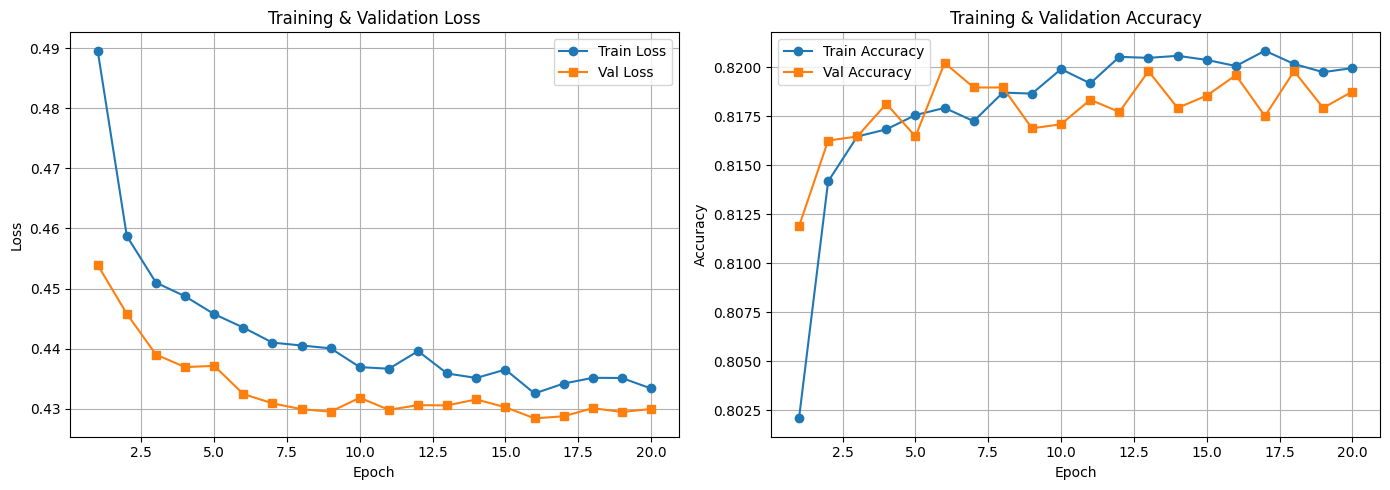

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(14, 5))

#loss plot 
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_history, label='Train Loss', marker='o')
plt.plot(epochs, val_loss_history, label='Val Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)

#accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_history, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc_history, label='Val Accuracy', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### 7. Evaluate the final trained model on the test dataset using model.evaluate(), and print the resulting test accuracy and loss to assess generalization performance.

In [11]:
model.eval()

test_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        test_loss += loss.item()

        preds = (y_pred > 0.5).float()
        correct_test += (preds == y_batch).sum().item()
        total_test += y_batch.size(0)

avg_test_loss = test_loss / len(test_loader)
test_accuracy = correct_test / total_test

print(f"\nTest Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.4357
Test Accuracy: 0.8175


#### 8. Evaluate model performance <br> Plot performance metrics and loss by epoch <br> Evaluate model in the test dataset <br> Display examples of images for each label and the prediction probabilities

__a. Plot performance metrics and loss by epoch__ <br>
In Question 6 above, we plotted trianing and validation loss and accuracy across 20 epochs. 

The graphs showed: <br>
steady convergenece <br>
no major overfitting <br>

___b. evaluate the model on the test dataset__

in question 7 above we evaluated the test set, here are the metrics reported above: <br>
Test Loss: 0.4357  <br>
Test Accuracy: 0.8175  <br>

Indicates good generalization

__c. display examples of each label and prediction probabilities__

In [12]:
X_sample, y_sample = next(iter(test_loader))

model.eval()
with torch.no_grad():
    y_probs = model(X_sample)
    y_preds = (y_probs > 0.5).float()

import numpy as np
X_sample_np = X_sample.numpy()
y_sample_np = y_sample.numpy()
y_probs_np = y_probs.numpy()
y_preds_np = y_preds.numpy()

shown_0 = shown_1 = 0
for i in range(len(X_sample_np)):
    label = int(y_sample_np[i])
    if (label == 0 and shown_0 < 3) or (label == 1 and shown_1 < 3):
        print(f"Sample {i+1}:")
        print(f"  True Label       : {label}")
        print(f"  Predicted Prob.  : {y_probs_np[i][0]:.4f}")
        print(f"  Predicted Class  : {int(y_preds_np[i][0])}")
        print(f"  Features (truncated): {np.round(X_sample_np[i][:5], 2)} ...")
        print("—" * 40)
        if label == 0:
            shown_0 += 1
        else:
            shown_1 += 1
    if shown_0 >= 3 and shown_1 >= 3:
        break

Sample 1:
  True Label       : 0
  Predicted Prob.  : 0.3185
  Predicted Class  : 0
  Features (truncated): [-1.21 -1.23  0.18  0.86 -0.38] ...
————————————————————————————————————————
Sample 2:
  True Label       : 0
  Predicted Prob.  : 0.1227
  Predicted Class  : 0
  Features (truncated): [ 0.86 -1.23 -1.08  0.86 -0.28] ...
————————————————————————————————————————
Sample 3:
  True Label       : 0
  Predicted Prob.  : 0.4333
  Predicted Class  : 0
  Features (truncated): [-0.37  0.81  1.44  0.86  1.24] ...
————————————————————————————————————————
Sample 5:
  True Label       : 1
  Predicted Prob.  : 0.4080
  Predicted Class  : 0
  Features (truncated): [-0.67  0.81  0.18 -1.05 -0.06] ...
————————————————————————————————————————
Sample 8:
  True Label       : 1
  Predicted Prob.  : 0.6842
  Predicted Class  : 1
  Features (truncated): [-1.06 -1.23  0.18 -1.05  0.37] ...
————————————————————————————————————————
Sample 9:
  True Label       : 1
  Predicted Prob.  : 0.1546
  Predicted Cl

/var/folders/4s/rxmc9std2qsb_vypd4r5yvt00000gn/T/ipykernel_17017/4064447856.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(y_sample_np[i])


#### 9. Try regurization tehniques: <br> l1,l2 regularization <br> Dropout

defining the regularized model

In [13]:
class RegularizedNN(nn.Module):
    def __init__(self, input_dim):
        super(RegularizedNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.3)
        self.out = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.sigmoid(self.out(x))  # Binary classification
        return x

set up model, l1+l2 regularization, loss and optimizer 

In [14]:
input_dim = X.shape[1]
model = RegularizedNN(input_dim)

criterion = nn.BCELoss()

#l2
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

#l1
l1_lambda = 1e-5

training loop with l1 loss added manually

In [15]:
num_epochs = 20
train_loss_his = []
val_loss_his = []
train_acc_his = []
val_acc_his = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct_train = 0
    total_train = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)

        l1_norm = sum(p.abs().sum() for p in model.parameters())
        loss = criterion(y_pred, y_batch) + l1_lambda * l1_norm

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = (y_pred > 0.5).float()
        correct_train += (preds == y_batch).sum().item()
        total_train += y_batch.size(0)

    train_loss_his.append(total_loss / len(train_loader))
    train_acc_his.append(correct_train / total_train)

    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

            preds = (y_pred > 0.5).float()
            correct_val += (preds == y_batch).sum().item()
            total_val += y_batch.size(0)

    val_loss_his.append(val_loss / len(val_loader))
    val_acc_his.append(correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Acc: {train_acc_his[-1]:.4f} | Val Acc: {val_acc_his[-1]:.4f}")

Epoch 1/20 | Train Acc: 0.8011 | Val Acc: 0.8144
Epoch 2/20 | Train Acc: 0.8139 | Val Acc: 0.8192
Epoch 3/20 | Train Acc: 0.8158 | Val Acc: 0.8210
Epoch 4/20 | Train Acc: 0.8157 | Val Acc: 0.8187
Epoch 5/20 | Train Acc: 0.8174 | Val Acc: 0.8185
Epoch 6/20 | Train Acc: 0.8182 | Val Acc: 0.8173
Epoch 7/20 | Train Acc: 0.8193 | Val Acc: 0.8185
Epoch 8/20 | Train Acc: 0.8184 | Val Acc: 0.8196
Epoch 9/20 | Train Acc: 0.8194 | Val Acc: 0.8192
Epoch 10/20 | Train Acc: 0.8190 | Val Acc: 0.8177
Epoch 11/20 | Train Acc: 0.8192 | Val Acc: 0.8190
Epoch 12/20 | Train Acc: 0.8183 | Val Acc: 0.8196
Epoch 13/20 | Train Acc: 0.8203 | Val Acc: 0.8185
Epoch 14/20 | Train Acc: 0.8191 | Val Acc: 0.8179
Epoch 15/20 | Train Acc: 0.8189 | Val Acc: 0.8183
Epoch 16/20 | Train Acc: 0.8206 | Val Acc: 0.8192
Epoch 17/20 | Train Acc: 0.8206 | Val Acc: 0.8190
Epoch 18/20 | Train Acc: 0.8204 | Val Acc: 0.8190
Epoch 19/20 | Train Acc: 0.8211 | Val Acc: 0.8181
Epoch 20/20 | Train Acc: 0.8190 | Val Acc: 0.8177


evaluate on the test dataset

In [16]:
model.eval()
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        test_loss += loss.item()

        preds = (y_pred > 0.5).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

print(f"Test Loss: {test_loss / len(test_loader):.4f}")
print(f"Test Accuracy: {correct / total:.4f}")

Test Loss: 0.4345
Test Accuracy: 0.8180


#### 10. Try also batch normalization and weight initilization (e.g., Gorot, He, LeCun)

In [17]:
class BatchNormInitNN(nn.Module):
    def __init__(self, input_dim):
        super(BatchNormInitNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(0.3)

        self.out = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.sigmoid(self.out(x))
        return x

def init_weights_he(module):
    if isinstance(module, nn.Linear):
        nn.init.kaiming_uniform_(module.weight, nonlinearity='relu')
        nn.init.zeros_(module.bias)

input_dim = X.shape[1]
model = BatchNormInitNN(input_dim)
model.apply(init_weights_he)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [18]:

num_epochs = 20
train_loss_bn, val_loss_bn = [], []
train_acc_bn, val_acc_bn = [], []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = (y_pred > 0.5).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    train_loss_bn.append(total_loss / len(train_loader))
    train_acc_bn.append(correct / total)

    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()
            preds = (y_pred > 0.5).float()
            correct_val += (preds == y_batch).sum().item()
            total_val += y_batch.size(0)

    val_loss_bn.append(val_loss / len(val_loader))
    val_acc_bn.append(correct_val / total_val)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Acc: {train_acc_bn[-1]:.4f} | Val Acc: {val_acc_bn[-1]:.4f}")


Epoch 1/20 | Train Acc: 0.7497 | Val Acc: 0.8104
Epoch 2/20 | Train Acc: 0.7985 | Val Acc: 0.8121
Epoch 3/20 | Train Acc: 0.8063 | Val Acc: 0.8146
Epoch 4/20 | Train Acc: 0.8079 | Val Acc: 0.8152
Epoch 5/20 | Train Acc: 0.8105 | Val Acc: 0.8146
Epoch 6/20 | Train Acc: 0.8092 | Val Acc: 0.8181
Epoch 7/20 | Train Acc: 0.8151 | Val Acc: 0.8173
Epoch 8/20 | Train Acc: 0.8141 | Val Acc: 0.8158
Epoch 9/20 | Train Acc: 0.8111 | Val Acc: 0.8183
Epoch 10/20 | Train Acc: 0.8127 | Val Acc: 0.8190
Epoch 11/20 | Train Acc: 0.8150 | Val Acc: 0.8185
Epoch 12/20 | Train Acc: 0.8144 | Val Acc: 0.8194
Epoch 13/20 | Train Acc: 0.8168 | Val Acc: 0.8187
Epoch 14/20 | Train Acc: 0.8128 | Val Acc: 0.8181
Epoch 15/20 | Train Acc: 0.8136 | Val Acc: 0.8177
Epoch 16/20 | Train Acc: 0.8155 | Val Acc: 0.8169
Epoch 17/20 | Train Acc: 0.8135 | Val Acc: 0.8190
Epoch 18/20 | Train Acc: 0.8164 | Val Acc: 0.8192
Epoch 19/20 | Train Acc: 0.8168 | Val Acc: 0.8185
Epoch 20/20 | Train Acc: 0.8144 | Val Acc: 0.8173


In [19]:
model.eval()
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        test_loss += loss.item()
        preds = (y_pred > 0.5).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

print(f"\nTest Loss: {test_loss / len(test_loader):.4f}")
print(f"Test Accuracy: {correct / total:.4f}")



Test Loss: 0.4363
Test Accuracy: 0.8200


#### 11. Compare the performance of your initial model in the test dataset against the performance of the models in item 14 and 15

### Model Performance Comparison

We compared 3 neural network configurations: 

| Model Version                        | Techniques Used                            | Test Accuracy | Test Loss |
|-------------------------------------|---------------------------------------------|---------------|-----------|
| **Initial Model (Q7)**              | Dropout only                                | 81.75%        | 0.4357    |
| **Regularized Model (Q9)**          | Dropout + L1 + L2 regularization            | 81.80%        | 0.4345    |
| **BatchNorm + He Init Model (Q10)** | Dropout + BatchNorm + He Initialization     | 82.00%        | 0.4363    |

---

### Comparison:

- The initial model performed well with dropout, reaching a 81.75% accuracy rate. 

- Adding L1 and L2 regularization in Q9 yielded a small but stable improvement - reduced overfitting and improved weight control 

- The model using Batch Normalization and He Initialization in Q10 performed better compared to the other 2 models with an accuracy of 82.00%. 
